In [14]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

In [15]:
EXPERIMENT = 'bivariate_power'
df = pd.read_csv(f'./results/{EXPERIMENT}_results.csv', sep=', ', engine='python')

In [25]:
plot_df = df

plot_df = plot_df.loc[
    (plot_df['Method'].isin(['KCI', 'Linear', 'GAM', 'FisherZ'])) &
    (plot_df['Number of environments'] == 2) &
    (plot_df['Soft'] == False)
]

plot_df = plot_df.replace({
    '[[];[0]]': 'P(X1)',
    '[[];[1]]': 'P(X2|X1)',
    '[[];[]]': 'Neither',
    '[[];[0;1]]': 'Both',
})

plot_df.rename(
    {
        "Method": "Test",
        # "n_samples": "Sample size",
        # "expected_fraction": "Expected fraction",
        # "intervention_targets": "Intervention targets",
        # "metric": "Metric",
    }, axis=1, inplace=True
)

In [29]:
intv_targets = ['P(X1)', 'P(X2|X1)', 'Neither', 'Both']
ax_var = 'intervention_targets'

for targets in intv_targets:
    display(plot_df[plot_df[ax_var] == targets].groupby('Test').mean().reset_index())

,Test,params_index,n_variables,n_total_environments,sample_size,reps,Soft,Number of environments,Rep,Number of possible DAGs,MEC size,MEC total edges,MEC unoriented edges,True orientation rate,False orientation rate,Precision,Recall,Average precision
0,FisherZ,0.0,2.0,2.0,200.0,20.0,0.0,2.0,9.5,1.35,2.0,1.0,2.0,0.60,0.05,0.95,0.60,0.9
1,GAM,0.0,2.0,2.0,200.0,20.0,0.0,2.0,9.5,1.50,2.0,1.0,2.0,0.45,0.05,0.95,0.45,0.8
2,KCI,0.0,2.0,2.0,200.0,20.0,0.0,2.0,9.5,1.45,2.0,1.0,2.0,0.50,0.05,0.95,0.50,0.9
3,Linear,0.0,2.0,2.0,200.0,20.0,0.0,2.0,9.5,1.70,2.0,1.0,2.0,0.25,0.05,0.95,0.25,0.7


,Test,params_index,n_variables,n_total_environments,sample_size,reps,Soft,Number of environments,Rep,Number of possible DAGs,MEC size,MEC total edges,MEC unoriented edges,True orientation rate,False orientation rate,Precision,Recall,Average precision
0,FisherZ,1.0,2.0,2.0,200.0,20.0,0.0,2.0,9.5,1.6,2.0,1.0,2.0,0.00,0.40,0.60,0.00,0.5
1,GAM,1.0,2.0,2.0,200.0,20.0,0.0,2.0,9.5,1.3,2.0,1.0,2.0,0.70,0.00,1.00,0.70,1.0
2,KCI,1.0,2.0,2.0,200.0,20.0,0.0,2.0,9.5,1.2,2.0,1.0,2.0,0.75,0.05,0.95,0.75,1.0
3,Linear,1.0,2.0,2.0,200.0,20.0,0.0,2.0,9.5,1.7,2.0,1.0,2.0,0.30,0.00,1.00,0.30,1.0


,Test,params_index,n_variables,n_total_environments,sample_size,reps,Soft,Number of environments,Rep,Number of possible DAGs,MEC size,MEC total edges,MEC unoriented edges,True orientation rate,False orientation rate,Precision,Recall,Average precision
0,FisherZ,2.0,2.0,2.0,200.0,20.0,0.0,2.0,9.5,1.90,2.0,1.0,2.0,0.05,0.05,0.95,0.05,0.85
1,GAM,2.0,2.0,2.0,200.0,20.0,0.0,2.0,9.5,1.90,2.0,1.0,2.0,0.10,0.00,1.00,0.10,0.75
2,KCI,2.0,2.0,2.0,200.0,20.0,0.0,2.0,9.5,1.95,2.0,1.0,2.0,0.00,0.05,0.95,0.00,0.80
3,Linear,2.0,2.0,2.0,200.0,20.0,0.0,2.0,9.5,1.90,2.0,1.0,2.0,0.05,0.05,0.95,0.05,0.75


,Test,params_index,n_variables,n_total_environments,sample_size,reps,Soft,Number of environments,Rep,Number of possible DAGs,MEC size,MEC total edges,MEC unoriented edges,True orientation rate,False orientation rate,Precision,Recall,Average precision
0,FisherZ,3.0,2.0,2.0,200.0,20.0,0.0,2.0,9.5,1.70,2.0,1.0,2.0,0.00,0.30,0.70,0.00,0.70
1,GAM,3.0,2.0,2.0,200.0,20.0,0.0,2.0,9.5,1.85,2.0,1.0,2.0,0.00,0.15,0.85,0.00,0.75
2,KCI,3.0,2.0,2.0,200.0,20.0,0.0,2.0,9.5,1.85,2.0,1.0,2.0,0.05,0.10,0.90,0.05,0.75
3,Linear,3.0,2.0,2.0,200.0,20.0,0.0,2.0,9.5,1.95,2.0,1.0,2.0,0.00,0.05,0.95,0.00,0.95


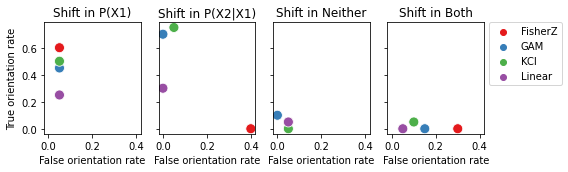

In [42]:
fig, axes = plt.subplots(1, 4, sharey=True, sharex=True, figsize=(8, 2.5))

intv_targets = ['P(X1)', 'P(X2|X1)', 'Neither', 'Both']
ax_var = 'intervention_targets'
x_var = 'False orientation rate' # 'Precision'
y_var = 'True orientation rate'# 'Average precision' #
hue = 'Test'

for targets, ax in zip(intv_targets, axes.flatten()):
    g = sns.scatterplot(
        data=plot_df[plot_df[ax_var] == targets].groupby('Test').mean().reset_index(),
        x=x_var,
        y=y_var,
        hue=hue,
        ax=ax,
        # markers=['d', 'P', 's'],
        palette='Set1',
        legend='full',
        # alpha=1,
        s=100
    )
    # ax.axvline(0.05, ls=':', c='grey')
    ax.set_title(f'Shift in {targets}')
    
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
for ax in axes[:-1]:
    ax.get_legend().remove()
plt.tight_layout()
plt.savefig('./figures/bivariate_power_plots.pdf')
plt.show()